In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.shape

(10000, 14)

In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [9]:
df[['HasCrCard','IsActiveMember','Exited']]=df[['HasCrCard','IsActiveMember','Exited']].astype('object')

In [10]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


In [12]:
df.describe(include='object')

,Geography,Gender,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000
unique,3,2,2,2,2
top,France,Male,1,1,0
freq,5014,5457,7055,5151,7963


In [13]:
num_df=df.select_dtypes(np.number)
num_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

In [14]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [15]:
df_France=df[df['Geography']=='France']
df_Germany=df[df['Geography']=='Germany']
df_Spain=df[df['Geography']=='Spain']

In [16]:
df_France.shape,df_Germany.shape,df_Spain.shape

((5014, 11), (2509, 11), (2477, 11))

## Building model for **France Region**


In [17]:
df[['HasCrCard','IsActiveMember','Exited']]=df[['HasCrCard','IsActiveMember','Exited']].astype(np.number)

In [18]:
df_France=df[df['Geography']=='France']
df_Germany=df[df['Geography']=='Germany']
df_Spain=df[df['Geography']=='Spain']

In [19]:
df_France.shape

(5014, 11)

In [20]:
df_France.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1.0
2,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1.0
3,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0.0
6,822,France,Male,50,7,0.00,2,1.0,1.0,10062.80,0.0
8,501,France,Male,44,4,142051.07,2,0.0,1.0,74940.50,0.0


In [21]:
df_France=df_France.drop('Geography',axis=1)

In [22]:
df_France.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5014 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      5014 non-null   int64  
 1   Gender           5014 non-null   object 
 2   Age              5014 non-null   int64  
 3   Tenure           5014 non-null   int64  
 4   Balance          5014 non-null   float64
 5   NumOfProducts    5014 non-null   int64  
 6   HasCrCard        5014 non-null   float64
 7   IsActiveMember   5014 non-null   float64
 8   EstimatedSalary  5014 non-null   float64
 9   Exited           5014 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 430.9+ KB


In [23]:
x=pd.get_dummies(df_France['Gender'],drop_first=True,prefix='Gender')

In [24]:
df_France['Gender_Male']=x

In [25]:
df_France.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619,Female,42,2,0.00,1,1.0,1.0,101348.88,1.0,0
2,502,Female,42,8,159660.80,3,1.0,0.0,113931.57,1.0,0
3,699,Female,39,1,0.00,2,0.0,0.0,93826.63,0.0,0
6,822,Male,50,7,0.00,2,1.0,1.0,10062.80,0.0,1
8,501,Male,44,4,142051.07,2,0.0,1.0,74940.50,0.0,1


In [26]:
df_France=df_France.drop('Gender',axis=1)

In [27]:
df_France['Gender_Male']=df_France['Gender_Male'].astype('int')

In [28]:
df_France['Exited'].value_counts()

0.0    4204
1.0     810
Name: Exited, dtype: int64

In [29]:
y=df_France['Exited']
x=df_France.drop('Exited',axis=1)

## Checking Variable importance using Machine Learning

In [30]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(x, y)

importance = model.feature_importances_

imp=pd.DataFrame({'columns':x.columns,'Importance':importance})
imp=imp.sort_values(by='Importance',ascending=False)
imp


,columns,Importance
1,Age,0.232754
7,EstimatedSalary,0.166137
0,CreditScore,0.153711
3,Balance,0.145672
4,NumOfProducts,0.123555
2,Tenure,0.075300
6,IsActiveMember,0.060003
8,Gender_Male,0.023606
5,HasCrCard,0.019263


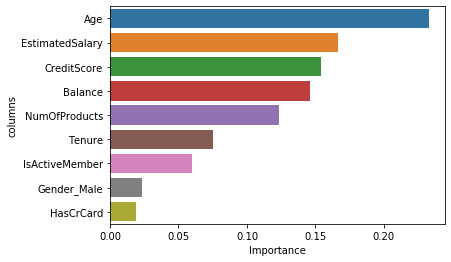

In [31]:
sns.barplot(imp['Importance'],imp['columns'])

We can see that the HasCrCard has the least importance among all the variables.
But I will build the model by considering **all the variables in consideration** for prediction. 

## Model Building

In [32]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='liblinear')


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,40),'weights':['uniform','distance']}
gsearch=GridSearchCV(knn,param_grid=params,cv=10,scoring='roc_auc')
gsearch.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [34]:
knn=KNeighborsClassifier(**gsearch.best_params_)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
rfc=RandomForestClassifier()

params={'n_estimators':sp_randint(1,200),
       'criterion':['gini','entropy'],
        'max_features':sp_randint(2,20),
        'max_depth':sp_randint(1,20),
        'min_samples_split':sp_randint(2,50),
        'min_samples_leaf':sp_randint(1,50)}

rsearch_rfc=RandomizedSearchCV(rfc,param_distributions=params,n_iter=25,n_jobs=-1,
                          scoring='roc_auc',cv=3)
rsearch_rfc.fit(x,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [36]:
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)

In [37]:
models=[]
models.append(('Logistic',lg))
models.append(('KNearestNeighbor',knn))
models.append(('Random Forest',rfc))

Logistic 0.6664079211837368 0.02347664578916392
KNearestNeighbor 0.5218688257918608 0.017561753208029555
Random Forest 0.8475405571358788 0.01749945400971058


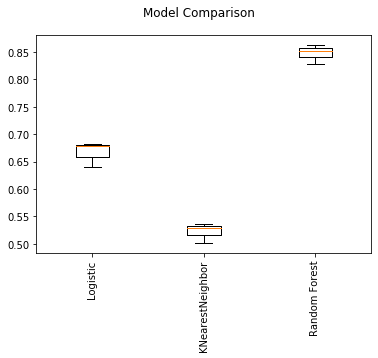

In [38]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
results=[]
names=[]
for name,model in models:
    skfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=4)
    cv_result=cross_val_score(model,x,y,scoring='roc_auc',cv=skfold)
    results.append(cv_result)
    names.append(name)
    print(name,np.mean(cv_result),np.std(cv_result,ddof=1))
    
fig=plt.figure()
fig.suptitle('Model Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.show()
    

## Building Model for Germany Region

In [39]:
df_Germany.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1.0,0.0,119346.88,1.0
15,616,Germany,Male,45,3,143129.41,2,0.0,1.0,64327.26,0.0
16,653,Germany,Male,58,1,132602.88,1,1.0,0.0,5097.67,1.0
26,756,Germany,Male,36,2,136815.64,1,1.0,1.0,170041.95,0.0
28,574,Germany,Female,43,3,141349.43,1,1.0,1.0,100187.43,0.0


In [40]:
df_Germany.shape

(2509, 11)

In [41]:
df_Germany['Exited'].value_counts()

0.0    1695
1.0     814
Name: Exited, dtype: int64

In [42]:
df_Germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 7 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      2509 non-null   int64  
 1   Geography        2509 non-null   object 
 2   Gender           2509 non-null   object 
 3   Age              2509 non-null   int64  
 4   Tenure           2509 non-null   int64  
 5   Balance          2509 non-null   float64
 6   NumOfProducts    2509 non-null   int64  
 7   HasCrCard        2509 non-null   float64
 8   IsActiveMember   2509 non-null   float64
 9   EstimatedSalary  2509 non-null   float64
 10  Exited           2509 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 235.2+ KB


In [43]:
df_Germany=df_Germany.drop('Geography',axis=1)


In [44]:
male_german=pd.get_dummies(df_Germany['Gender'],drop_first=True,prefix='Gender')
male_german.head()

,Gender_Male
7,0
15,1
16,1
26,1
28,0


In [45]:

df_Germany=df_Germany.drop('Gender',axis=1)

In [46]:
df_Germany.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,29,4,115046.74,4,1.0,0.0,119346.88,1.0
15,616,45,3,143129.41,2,0.0,1.0,64327.26,0.0
16,653,58,1,132602.88,1,1.0,0.0,5097.67,1.0
26,756,36,2,136815.64,1,1.0,1.0,170041.95,0.0
28,574,43,3,141349.43,1,1.0,1.0,100187.43,0.0


In [47]:
df_Germany['Gender_Male']=male_german

In [48]:
df_Germany.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
7,376,29,4,115046.74,4,1.0,0.0,119346.88,1.0,0
15,616,45,3,143129.41,2,0.0,1.0,64327.26,0.0,1
16,653,58,1,132602.88,1,1.0,0.0,5097.67,1.0,1
26,756,36,2,136815.64,1,1.0,1.0,170041.95,0.0,1
28,574,43,3,141349.43,1,1.0,1.0,100187.43,0.0,0


In [49]:
x=df_Germany.drop('Exited',axis=1)
y=df_Germany['Exited']

In [50]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(x, y)

importance = model.feature_importances_

imp=pd.DataFrame({'columns':x.columns,'Importance':importance})
imp=imp.sort_values(by='Importance',ascending=False)
imp


,columns,Importance
1,Age,0.262870
3,Balance,0.177187
7,EstimatedSalary,0.138623
4,NumOfProducts,0.134898
0,CreditScore,0.134795
2,Tenure,0.069431
6,IsActiveMember,0.047244
8,Gender_Male,0.019368
5,HasCrCard,0.015583


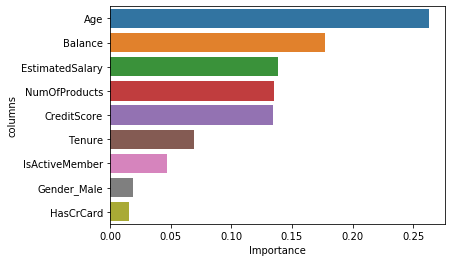

In [51]:
sns.barplot(imp['Importance'],imp['columns'])

## Model Building

In [52]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='liblinear')

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,60),'weights':['uniform','distance']}
gsearch=GridSearchCV(knn,param_grid=params,cv=10,scoring='roc_auc')
gsearch.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
rfc=RandomForestClassifier()

params={'n_estimators':sp_randint(1,200),
       'criterion':['gini','entropy'],
        'max_features':sp_randint(2,20),
        'max_depth':sp_randint(1,20),
        'min_samples_split':sp_randint(2,50),
        'min_samples_leaf':sp_randint(1,50)}

rsearch_rfc=RandomizedSearchCV(rfc,param_distributions=params,n_iter=25,n_jobs=-1,
                          scoring='roc_auc',cv=3)
rsearch_rfc.fit(x,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [55]:
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)

In [56]:
models=[]
models.append(('Logistic',lg))
models.append(('KNearestNeighbor',knn))
models.append(('Random Forest',rfc))

Logistic 0.6988185142783235 0.0067100304839892285
KNearestNeighbor 0.5601079470255921 0.018534532984206972
Random Forest 0.8492471457119569 0.015165203173394984


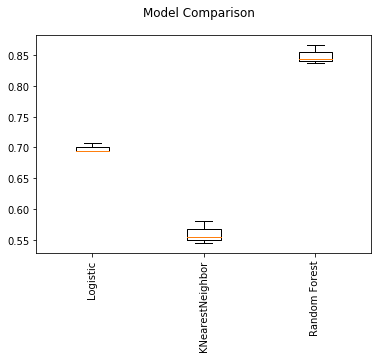

In [57]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
results=[]
names=[]
for name,model in models:
    skfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=4)
    cv_result=cross_val_score(model,x,y,scoring='roc_auc',cv=skfold)
    results.append(cv_result)
    names.append(name)
    print(name,np.mean(cv_result),np.std(cv_result,ddof=1))
    
fig=plt.figure()
fig.suptitle('Model Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.show()
    

## Building Model for Spain Region

In [58]:
df_Spain.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0.0
4,850,Spain,Female,43,2,125510.82,1,1.0,1.0,79084.10,0.0
5,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1.0
11,497,Spain,Male,24,3,0.00,2,1.0,0.0,76390.01,0.0
14,635,Spain,Female,35,7,0.00,2,1.0,1.0,65951.65,0.0


In [59]:
df_Spain['Exited'].value_counts()

0.0    2064
1.0     413
Name: Exited, dtype: int64

In [60]:
df_Spain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 1 to 9992
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      2477 non-null   int64  
 1   Geography        2477 non-null   object 
 2   Gender           2477 non-null   object 
 3   Age              2477 non-null   int64  
 4   Tenure           2477 non-null   int64  
 5   Balance          2477 non-null   float64
 6   NumOfProducts    2477 non-null   int64  
 7   HasCrCard        2477 non-null   float64
 8   IsActiveMember   2477 non-null   float64
 9   EstimatedSalary  2477 non-null   float64
 10  Exited           2477 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 232.2+ KB


In [61]:
df_Spain=df_Spain.drop('Geography',axis=1)


In [62]:
male_spain=pd.get_dummies(df_Spain['Gender'],drop_first=True,prefix='Gender')
male_spain.head()

,Gender_Male
1,0
4,0
5,1
11,1
14,0


In [63]:
df_Spain=df_Spain.drop('Gender',axis=1)

In [64]:
df_Spain['Gender_Male']=male_spain

In [65]:
df_Spain.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
1,608,41,1,83807.86,1,0.0,1.0,112542.58,0.0,0
4,850,43,2,125510.82,1,1.0,1.0,79084.10,0.0,0
5,645,44,8,113755.78,2,1.0,0.0,149756.71,1.0,1
11,497,24,3,0.00,2,1.0,0.0,76390.01,0.0,1
14,635,35,7,0.00,2,1.0,1.0,65951.65,0.0,0


In [66]:
x=df_Spain.drop('Exited',axis=1)
y=df_Spain['Exited']

In [67]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(x, y)

importance = model.feature_importances_

imp=pd.DataFrame({'columns':x.columns,'Importance':importance})
imp=imp.sort_values(by='Importance',ascending=False)
imp

,columns,Importance
1,Age,0.207910
3,Balance,0.169210
7,EstimatedSalary,0.161707
0,CreditScore,0.158343
4,NumOfProducts,0.119848
2,Tenure,0.073436
6,IsActiveMember,0.070727
8,Gender_Male,0.022088
5,HasCrCard,0.016731


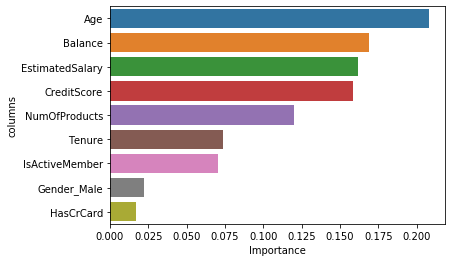

In [68]:
sns.barplot(imp['Importance'],imp['columns'])

## Model Building

In [69]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='liblinear')

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,40),'weights':['uniform','distance']}
gsearch=GridSearchCV(knn,param_grid=params,cv=10,scoring='roc_auc')
gsearch.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [71]:
knn=KNeighborsClassifier(**gsearch.best_params_)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
rfc=RandomForestClassifier()

params={'n_estimators':sp_randint(1,200),
       'criterion':['gini','entropy'],
        'max_features':sp_randint(2,20),
        'max_depth':sp_randint(1,20),
        'min_samples_split':sp_randint(2,50),
        'min_samples_leaf':sp_randint(1,50)}

rsearch_rfc=RandomizedSearchCV(rfc,param_distributions=params,n_iter=25,n_jobs=-1,
                          scoring='roc_auc',cv=3)
rsearch_rfc.fit(x,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [73]:
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)

In [74]:
models=[]
models.append(('Logistic',lg))
models.append(('KNearestNeighbor',knn))
models.append(('Random Forest',rfc))

Logistic 0.617920426598504 0.01690488110215242
KNearestNeighbor 0.5730143295635609 0.020313769439327178
Random Forest 0.8412721147135933 0.02618193754618746


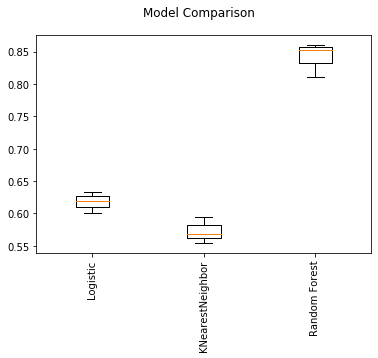

In [75]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
results=[]
names=[]
for name,model in models:
    skfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=4)
    cv_result=cross_val_score(model,x,y,scoring='roc_auc',cv=skfold)
    results.append(cv_result)
    names.append(name)
    print(name,np.mean(cv_result),np.std(cv_result,ddof=1))
    
fig=plt.figure()
fig.suptitle('Model Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.show()
    